<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
    
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<h1><center><font size=10>NLP based Chatbot in domain of Industrial safety</center></font></h1>
<h1><center>Natural Language Processing - Capstone</center></h1>

## Problem Statement

### • DOMAIN: Industrial safety. NLP based Chatbot.

### • CONTEXT:

- The database comes from one of the biggest industry in Brazil and in the world. It is an urgent need for industries/companies around the globe to understand why employees still suffer some injuries/accidents in plants. Sometimes they also die in such environment.
### • DATA DESCRIPTION:
- This The database is basically records of accidents from 12 different plants in 03 different countries which every line in the data is an occurrence of an accident.
- Columns description:
    - ‣ Data: timestamp or time/date information
    - ‣ Countries: which country the accident occurred (anonymised)
    - ‣ Local: the city where the manufacturing plant is located (anonymised)
    - ‣ Industry sector: which sector the plant belongs to
    - ‣ Accident level: from I to VI, it registers how severe was the accident (I means not severe but VI means very severe)
    - ‣ Potential Accident Level: Depending on the Accident Level, the database also registers how severe the accident could have been (due to other factors involved in the accident)
    - ‣ Genre: if the person is male of female
    - ‣ Employee or Third Party: if the injured person is an employee or a third party
    - ‣ Critical Risk: some description of the risk involved in the accident
    - ‣ Description: Detailed description of how the accident happened.

### • PROJECT OBJECTIVE:

- Design a ML/DL based chatbot utility which can help the professionals to highlight the safety risk as per the incident description.

#### • PROJECT TASK: [ Score: 100 points]

##### 1. Milestone 1: [ Score: 40 points ]
##### ‣ Input: Context and Dataset
##### ‣ Process:
- ‣ Step 1: Import the data [ 3 points ]
- ‣ Step 2: Data cleansing [ 5 points ]
- ‣ Step 3: Data preprocessing (NLP Preprocessing techniques) [ 7 points ]
- ‣ Step 4: Data preparation - Cleansed data in .xlsx or .csv file [ 5 points ]
- ‣ Step 5: Design train and test basic machine learning classifiers [ 10 Points ]
- ‣ Step 6: Interim report [ 10 points ]
- ‣ Submission: Interim report, Jupyter Notebook with all the steps in Milestone-1

### Importing the necessary libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import sys
# installing libraries to use word embeddings
!pip install gensim -q  
!{sys.executable} -m pip install contractions

In [2]:
# to read and manipulate the data
import pandas as pd
import numpy as np
pd.set_option('max_colwidth', None)    # setting column to the maximum column width as per the data

# to visualise data
import matplotlib.pyplot as plt
import seaborn as sns

# to use regular expressions for manipulating text data
import re

# to load the natural language toolkit
import nltk
nltk.download('stopwords')    # loading the stopwords
nltk.download('wordnet')    # loading the wordnet module that is used in stemming
nltk.download('omw-1.4')    # needed for lemmetization
nltk.download('averaged_perceptron_tagger') # needed for lemmetization tags of part-of-speech

import contractions #Needed to expand english contactions like - I'm -> I am

# to remove common stop words
from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
lemmatizer = WordNetLemmatizer()



# To encode the target variable
from sklearn.preprocessing import LabelEncoder

# To import Word2Vec
from gensim.models import Word2Vec

# To tune the model
from sklearn.model_selection import GridSearchCV

# Converting the Stanford GloVe model vector format to word2vec
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors

# To split data into train and test sets
from sklearn.model_selection import train_test_split

# To build a Random Forest model
from sklearn.ensemble import RandomForestClassifier

# To compute metrics to evaluate the model
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, classification_report


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prakuma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\prakuma\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\prakuma\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\prakuma\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [3]:
# loading the dataset
given_sheet = 'Data Set - industrial_safety_an'
file_name = 'Industrial_safety_and_health_database_with_accidents_description.xlsx' 
df = pd.read_excel(file_name, sheet_name=given_sheet)

In [4]:
# creating a copy of the dataset
data = df.copy()

In [5]:
# Print first 5 rows of data
data.head()

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,"While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo."
1,1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,"During the activation of a sodium sulphide pump, the piping was uncoupled and the sulfide solution was designed in the area to reach the maid. Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital. Note: of sulphide solution = 48 grams / liter."
2,2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,"In the sub-station MILPO located at level +170 when the collaborator was doing the excavation work with a pick (hand tool), hitting a rock with the flat part of the beak, it bounces off hitting the steel tip of the safety shoe and then the metatarsal area of ​​the left foot of the collaborator causing the injury."
3,3,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,"Being 9:45 am. approximately in the Nv. 1880 CX-695 OB7, the personnel begins the task of unlocking the Soquet bolts of the BHB machine, when they were in the penultimate bolt they identified that the hexagonal head was worn, proceeding Mr. Cristóbal - Auxiliary assistant to climb to the platform to exert pressure with your hand on the ""DADO"" key, to prevent it from coming out of the bolt; in those moments two collaborators rotate with the lever in anti-clockwise direction, leaving the key of the bolt, hitting the palm of the left hand, causing the injury."
4,4,2016-01-10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,"Approximately at 11:45 a.m. in circumstances that the mechanics Anthony (group leader), Eduardo and Eric Fernández-injured-the three of the Company IMPROMEC, performed the removal of the pulley of the motor of the pump 3015 in the ZAF of Marcy. 27 cm / Length: 33 cm / Weight: 70 kg), as it was locked proceed to heating the pulley to loosen it, it comes out and falls from a distance of 1.06 meters high and hits the instep of the right foot of the worker, causing the injury described."


### dropping the rownum from data as it won't be adding any value in analysis 

In [6]:
data = data.drop('Unnamed: 0', axis=1)

In [7]:
# Print random 5 rows of data
data.sample(5)

,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
122,2016-05-22,Country_02,Local_08,Metals,I,III,Male,Employee,Blocking and isolation of energies,"During the maintenance on the LX-P-205B pump, there was the projection of silicate pulp, reaching the right leg of the employee."
88,2016-04-11,Country_01,Local_01,Mining,I,IV,Male,Employee,Others,"When positioning the scissor bolter N ° 09 in the East of stope 175 (40 meters from the top), the operator and his assistant verify that the ventilation sleeve will obstruct the support of the left gable, so they decide to section the sleeve and direct it towards the main corridor; the injured person decides to climb to the roof of the equipment cabin (surface: 1.5 square meters) to carry out the reinstallation of the sectioned sleeve and, without noticing, he steps on empty and falls from the equipment from a height of 2.50 meters. At the time of the accident, the operator was on the scissor bolter platform, the equipment was positioned and blocked to perform the maintenance and the assistant was wearing a safety helmet and chin strap."
345,2017-03-02,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,"On 02/03/17 during the soil sampling in the region of Sta. the employees Rafael and Danillo da Silva were attacked by a bee test. They rushed away from the place, but the employee Rafael took 4 bites, one on the chin, one on the chest, one on the neck and one on the hand over the glove. The employee took 4 bites, one in his hand over his glove and the other in the head, and the employee Danillo took 2 bites in the left arm over his uniform. At first no one sketched allergy, just swelling at the sting site. The activity was stopped to evaluate the site, after verifying that the test had remained in the line, they left the site."
89,2016-04-14,Country_02,Local_08,Metals,I,III,Male,Employee,Pressurized Systems,"During the cleaning of the 16 ""vertical pipe using the hydrojet equipment (high pressure hose), the hose returned due to obstruction of the pipe with residue, reaching the operator who was actuating the equipment pedal ."
186,2016-08-04,Country_02,Local_08,Metals,I,II,Male,Employee,Cut,"When removing the cap from the wear plate of the Warman LX-BB-01 pump, the left hand of the employee who was with the glove slipped came to have contact with the cutting part of the board."


### Renaming meaningful column headers looks typos in data collection

In [8]:
# Rename 'Data'-> 'Date', 'Countries'->'Country', 'Genre'->'Gender', 'Employee or Third Party'->'Employemee Type' columns in Data frame
data.rename(columns={'Data':'Date', 'Countries':'Country', 'Genre':'Gender', 'Employee or Third Party':'Employee Type'}, inplace=True)

In [9]:
# checking updated headers
data.head()

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee Type,Critical Risk,Description
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,"While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo."
1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,"During the activation of a sodium sulphide pump, the piping was uncoupled and the sulfide solution was designed in the area to reach the maid. Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital. Note: of sulphide solution = 48 grams / liter."
2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,"In the sub-station MILPO located at level +170 when the collaborator was doing the excavation work with a pick (hand tool), hitting a rock with the flat part of the beak, it bounces off hitting the steel tip of the safety shoe and then the metatarsal area of ​​the left foot of the collaborator causing the injury."
3,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,"Being 9:45 am. approximately in the Nv. 1880 CX-695 OB7, the personnel begins the task of unlocking the Soquet bolts of the BHB machine, when they were in the penultimate bolt they identified that the hexagonal head was worn, proceeding Mr. Cristóbal - Auxiliary assistant to climb to the platform to exert pressure with your hand on the ""DADO"" key, to prevent it from coming out of the bolt; in those moments two collaborators rotate with the lever in anti-clockwise direction, leaving the key of the bolt, hitting the palm of the left hand, causing the injury."
4,2016-01-10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,"Approximately at 11:45 a.m. in circumstances that the mechanics Anthony (group leader), Eduardo and Eric Fernández-injured-the three of the Company IMPROMEC, performed the removal of the pulley of the motor of the pump 3015 in the ZAF of Marcy. 27 cm / Length: 33 cm / Weight: 70 kg), as it was locked proceed to heating the pulley to loosen it, it comes out and falls from a distance of 1.06 meters high and hits the instep of the right foot of the worker, causing the injury described."


### Checking the shape of the dataset

In [10]:
# print shape of data
data.shape

(425, 10)

### Checking for missing values

In [11]:
# Check for missing values
data.isnull().sum()

Date                        0
Country                     0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Gender                      0
Employee Type               0
Critical Risk               0
Description                 0
dtype: int64

- There are no mising values in the data

### Checking for duplicate values

In [12]:
# Check for duplicate values
data.duplicated().sum()

7

- Found 7 duplicate rows, will drop of duplicate rows

In [13]:
data = data.drop_duplicates()

# resetting the dataframe index
data.reset_index(drop=True, inplace=True)

In [14]:
# Check for duplicate values again
data.duplicated().sum()

0

### Checking the statistical summary

In [15]:
dataWithoutDate = data.drop('Date', axis=1)
dataWithoutDate.describe()

,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee Type,Critical Risk,Description
count,418,418,418,418,418,418,418,418,418
unique,3,12,3,5,6,2,3,33,411
top,Country_01,Local_03,Mining,I,IV,Male,Third Party,Others,"During the activity of chuteo of ore in hopper OP5; the operator of the locomotive parks his equipment under the hopper to fill the first car, it is at this moment that when it was blowing out to release the load, a mud flow suddenly appears with the presence of rock fragments; the personnel that was in the direction of the flow was covered with mud."
freq,248,89,237,309,141,396,185,229,2


- There seem to a large number of incidents from the Mining Industry Sector

## Exploratory Data Analysis (EDA)

In [16]:
# function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=12)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=10,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Univariate Analysis

#### Distribution of incident's `Industry Sector`

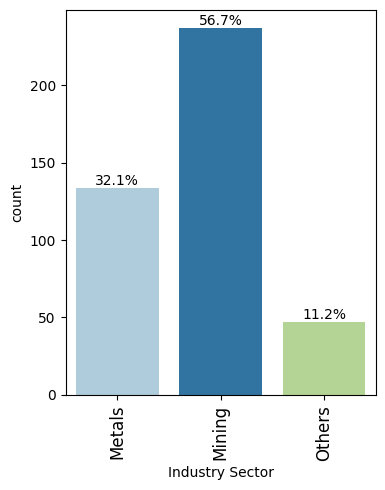

In [17]:
labeled_barplot(data, "Industry Sector", perc=True)

- Majority of the incidents in the data are from 
    - `Mining Industry Sector (56.7%)`, 
    - followed by `Metals Industry Sector (32.1%)` and 
    - rest of are contributed from `Others Industry Sector (11.2%)` 

#### Distribution of incident's `Accident Level`

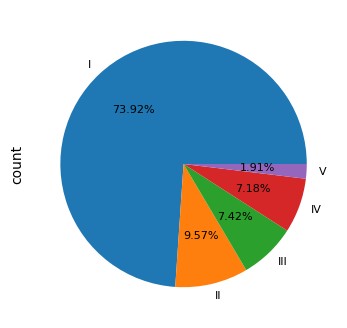

In [18]:
#labeled_barplot(data, "Accident Level", perc=True)
# Visualize a Pie-chart and print percentage
data['Accident Level'].value_counts().plot(kind='pie',figsize=(6, 4),autopct='%1.2f%%', fontsize=8)
plt.show()

#### Observations for `Accident Level` values distrubtion
- Most of incidents are from `Accident Level - I (73.9%)` i.e these are least severe incidents.
- Most Severe incidents of `Accident Level - V (1.9%)`
- No data for `Accident Level - VI`
- Data Distribution is very skewed with ~74% Type-I and 1.91% Type V

#### Distribution of incident's Potential Accident Level

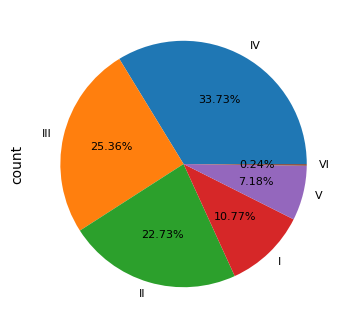

In [19]:
data['Potential Accident Level'].value_counts().plot(kind='pie',figsize=(6, 4),autopct='%1.2f%%', fontsize=8)
plt.show()

#### Observations for `Potential Accident` values distrubtion
- Here the values distribution are better than `Accident Level`.
- `Type VI` and `Type V` values are undersampled, especially `Type-VI with 0.24%` followed by `Type-V 7.18%` and `Type-I(10.77%)`.
- `Type-II, Type-III and Type-IV` are comparatively evenly distributed.


#### Distribution of incident's `Critical Risk`

In [20]:
data['Critical Risk'].value_counts()

Critical Risk
Others                                       229
Pressed                                       24
Manual Tools                                  20
Chemical substances                           17
Cut                                           14
Venomous Animals                              13
Projection                                    13
Bees                                          10
Fall                                           9
Vehicles and Mobile Equipment                  8
Fall prevention (same level)                   7
remains of choco                               7
Pressurized Systems                            7
Fall prevention                                6
Suspended Loads                                6
Blocking and isolation of energies             3
Pressurized Systems / Chemical Substances      3
Power lock                                     3
Liquid Metal                                   3
Machine Protection                             2
Electr

#### Renaming values for Critical Risk :
- "\nNot applicable" -> "Not applicable" and 
- "Pressurized Systems / Chemical Substances" -> "Pressurized Systems/Chemical Substances"

In [21]:
data['Critical Risk'] = data['Critical Risk'].replace(to_replace="\nNot applicable",
           value="Not applicable")
data['Critical Risk'] = data['Critical Risk'].replace(to_replace="Pressurized Systems / Chemical Substances",
           value="Pressurized Systems/Chemical Substances")

In [22]:
data['Critical Risk'].value_counts()

Critical Risk
Others                                     229
Pressed                                     24
Manual Tools                                20
Chemical substances                         17
Cut                                         14
Venomous Animals                            13
Projection                                  13
Bees                                        10
Fall                                         9
Vehicles and Mobile Equipment                8
Fall prevention (same level)                 7
remains of choco                             7
Pressurized Systems                          7
Fall prevention                              6
Suspended Loads                              6
Blocking and isolation of energies           3
Pressurized Systems/Chemical Substances      3
Power lock                                   3
Liquid Metal                                 3
Machine Protection                           2
Electrical Shock                             2

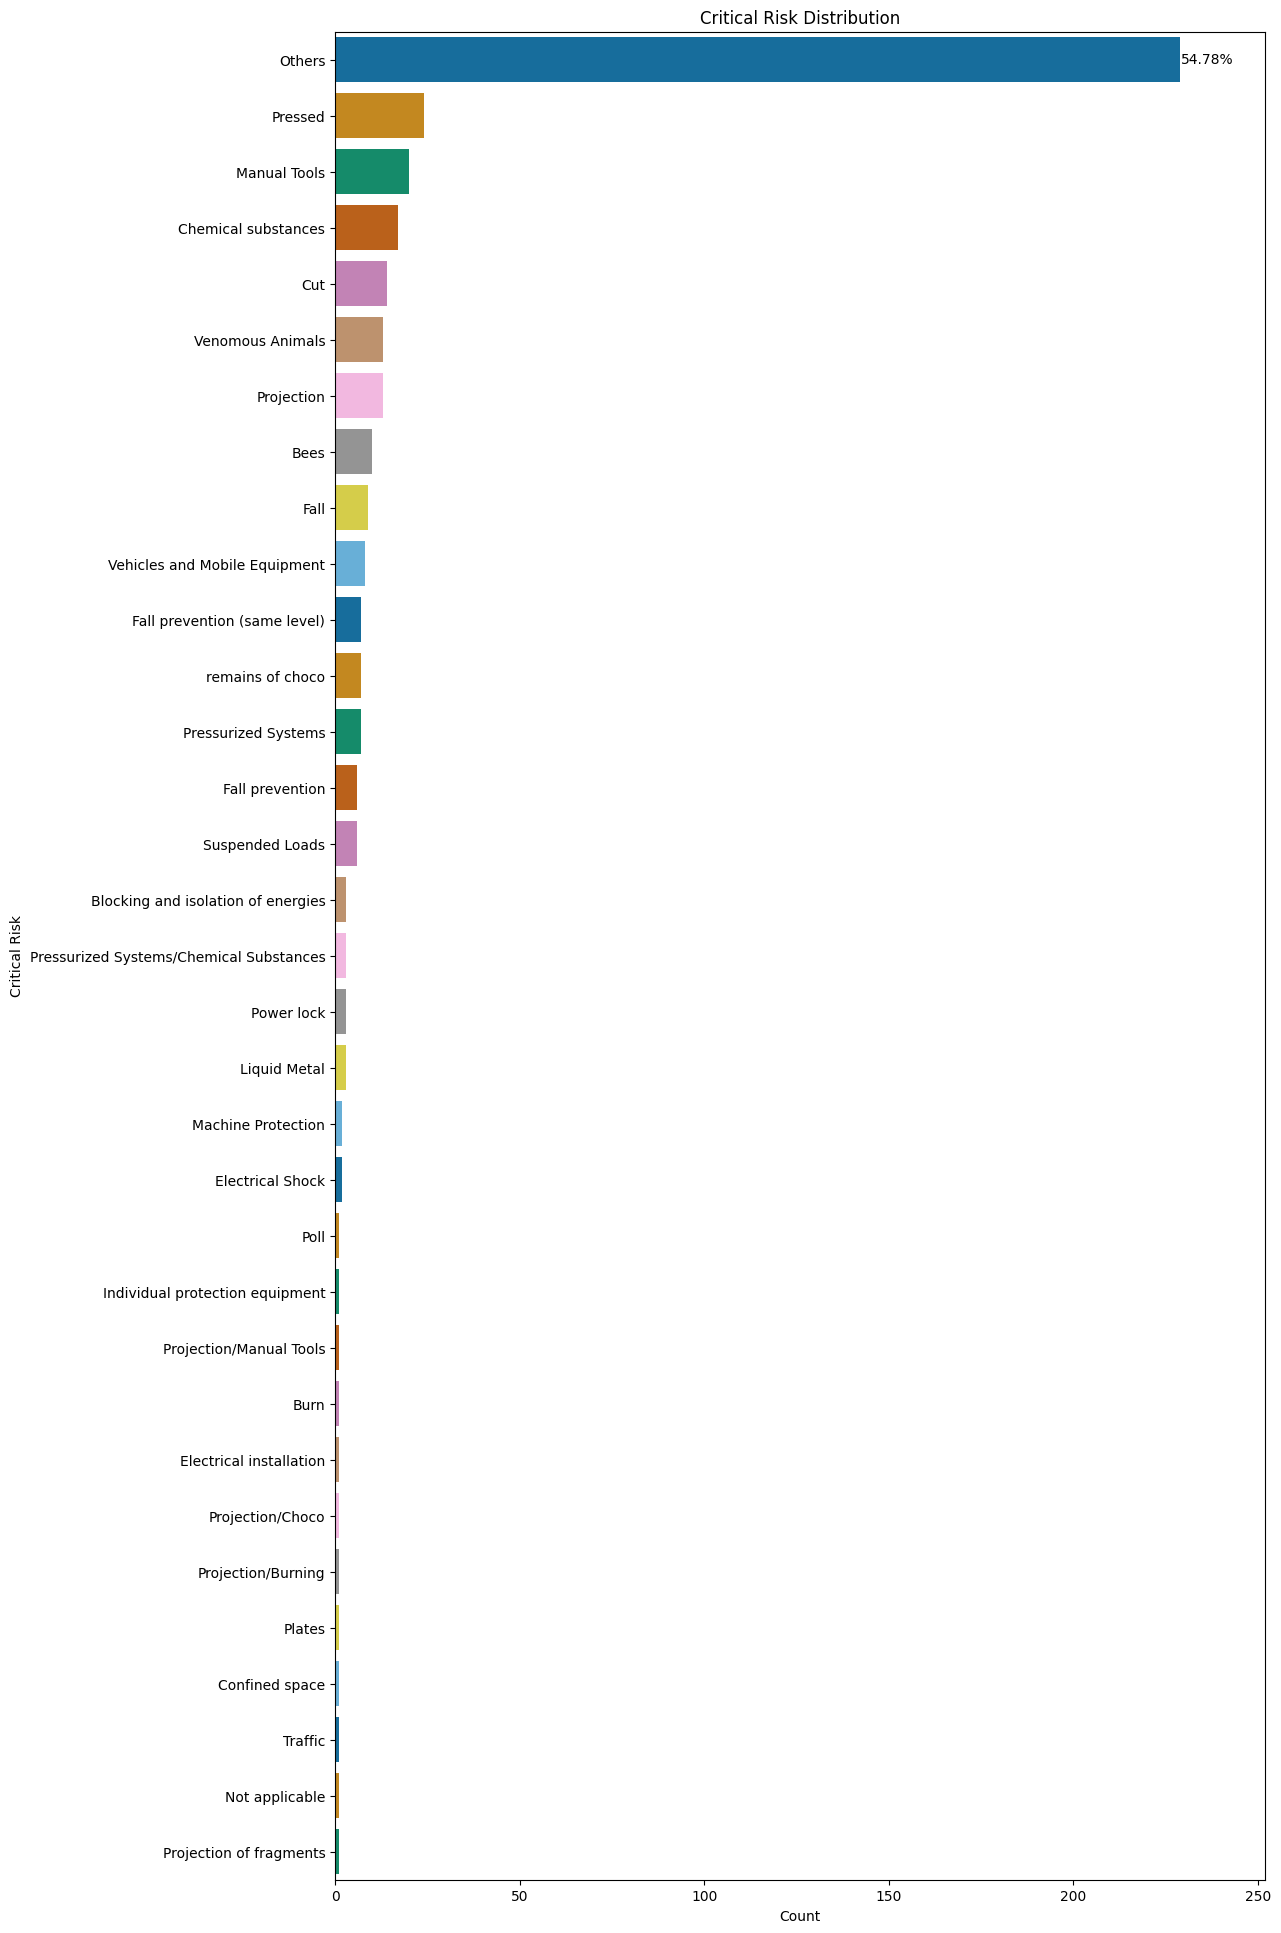

In [23]:
# Visualize ordered countPlot in transposed way since 33 values available for Critical Risk column
plt.figure(figsize=(12, 24))

ax = sns.countplot(y=data['Critical Risk'], palette='colorblind', order=data['Critical Risk'].value_counts(ascending=False).index)

# get the total count of the type column
total = data['Critical Risk'].count()

# annotate the bars with fmt from matplotlib v3.7.0
ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total)*100:0.2f}%')

# add space at the end of the bar for the labels
ax.margins(x=0.1)

ax.set(xlabel='Count', ylabel='Critical Risk', title='Critical Risk Distribution')
plt.show()

#### Observations for `Critical Risk` values distrubtion
- Its highly biased towards value - `Others (54.78%)`. This data could have been more explored and further split during data collection or there are huge number of smaller categories coming from other industry sector(excluding Mining and Metals) , may be better to confirm with data collector.
- Specific values like - `Pressed`, `Manual Tools`, `Checmical Substances`, `Cut` have noticebale percentages in range of `5.75` to `4.07`. These might be contributor of Mining and Metals industry.

#### Distribution of incident's Genre

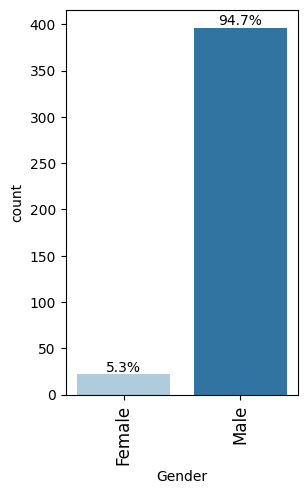

In [24]:
labeled_barplot(data, "Gender", perc=True)

#### Observations for `Gender` values distrubtion
- Count of Male involved in accidents is much higher with 94.7% compared to female accidents involvement.
- This might happen because of below factors:
    - Number of Male employees >> Number of Female employees (Risky Industry Sector)
    - Probability of Male making mistakes > Probability of Male making mistakes.

#### Distribution of incident's `Employee Type`

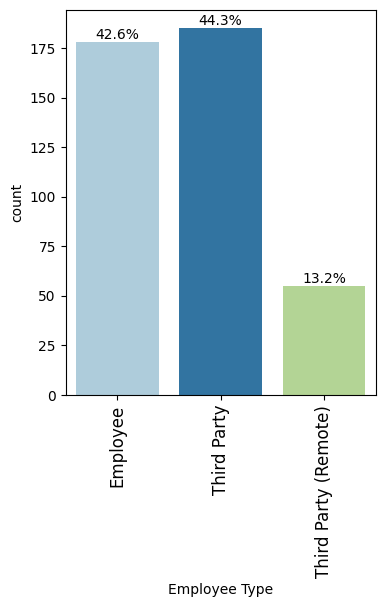

In [25]:
labeled_barplot(data, "Employee Type", perc=True)

#### Observations for `Employee Type` values distribution
- Third Party employees are more involved in accidents with 44.3%
- Folowed by core Employee having 43.6% accident involvement
- Third Party remote employee have 13.2% accident involvement. 
- Accidents involvement for Remote Employee looks significant if their overall employment percentage for companies are less compared core Employee and Third Party employee. Same for Third Party employee. This need to be investigated from overall Employee database, which is not provided here.


#### Distribution of incident's `Country`

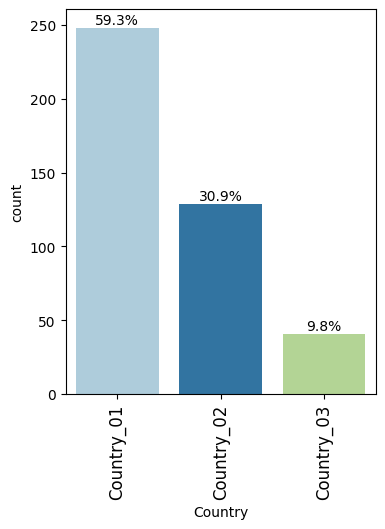

In [26]:
labeled_barplot(data, "Country", perc=True)

#### Observations for `Country` frequency distrubtion
- Country_01 has most count of incidents with 59.3%
- Country_02 has 30.9% reported incidents.
- Country_03 has least reported incidents with 9.8%.

#### Distribution of incident's `Local`

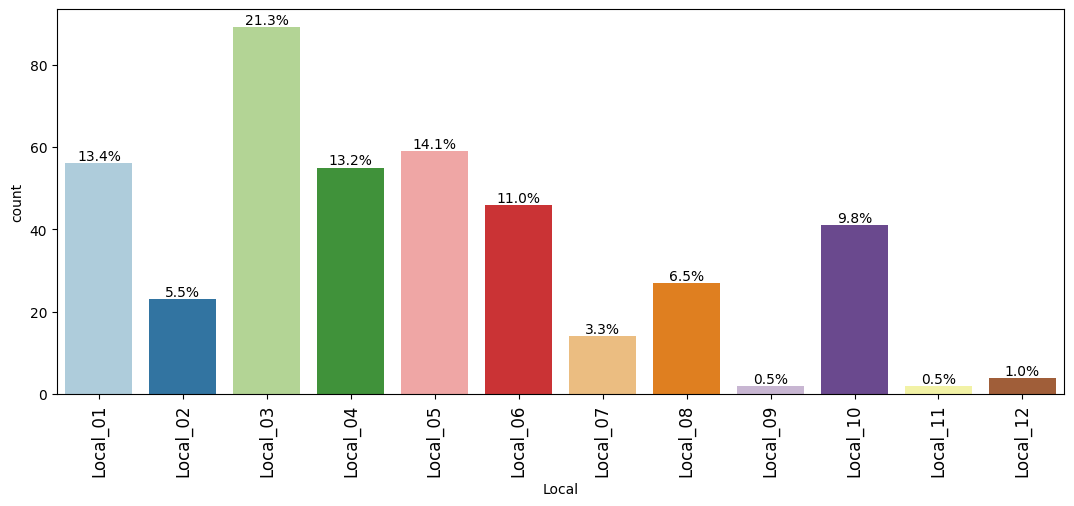

In [27]:
labeled_barplot(data, "Local", perc=True)

#### Observations for `Local` frequency distrubtion
- With `21.3% at Local_03`, `14.1% at Local_05`, `13.4% at Local_01`, `13.2% at Local_04` and `11.0% at Local_06` are locations with most number of incidents reported.
- With `0.5% at Local_03`, `0.5% at Local_05` and `1.0% at Local_01` are locations with least number of incidents reported.

#### Distribution of incident's `Date`

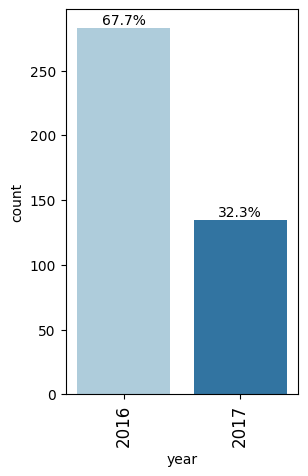

In [28]:
data['year'] = pd.to_datetime(data['Date']).dt.year
labeled_barplot(data, "year", perc=True)

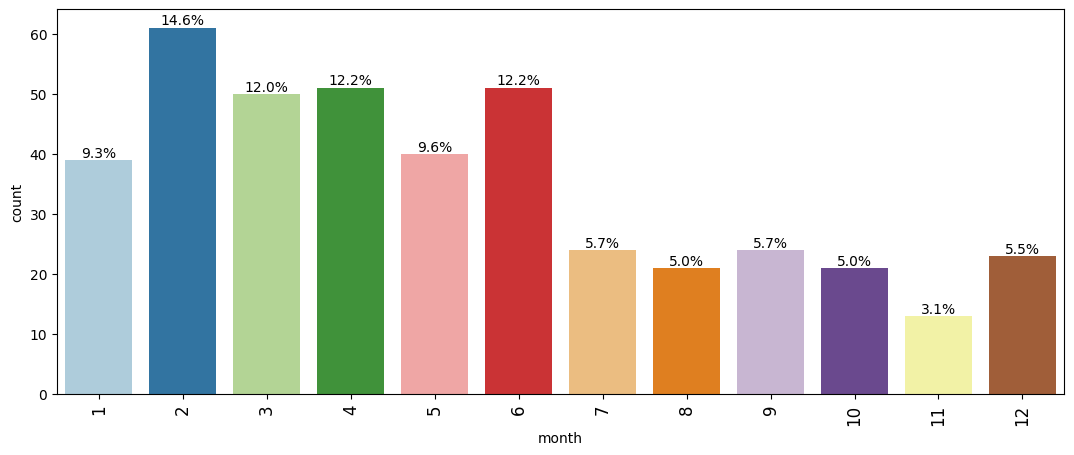

In [29]:
data['month'] = pd.to_datetime(data['Date']).dt.month
labeled_barplot(data, "month", perc=True)

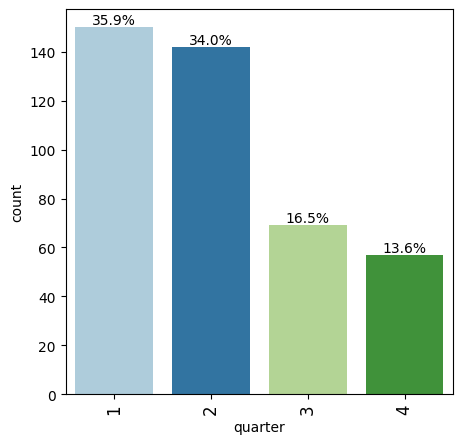

In [30]:
data['quarter'] = pd.to_datetime(data['Date']).dt.quarter
labeled_barplot(data, "quarter", perc=True)

#### Distribution of incident's Date values extracted in Year, Month, Quarter
- Year 2016 incidents(67.7%) have reduced to 1/3rd in next year 2017(32.3%). Looks measures have been taken to imporove the incidents among employees.
- 1st 6 months/(1st 2 quarters) of year have 2/3rd of incidents reported and only 1/3rd are reported in last 2 quarters.
- Incident counts have decreasing trend based on increasing quarters.

### BiVariate/Multivariate Analysis using stacked Charts for categorical columns

In [31]:
pd.crosstab(data['Local'], data['Country'])

Country,Country_01,Country_02,Country_03
Local,,,
Local_01,56,0,0
Local_02,0,23,0
Local_03,89,0,0
Local_04,55,0,0
Local_05,0,59,0
Local_06,46,0,0
Local_07,0,14,0
Local_08,0,27,0
Local_09,0,2,0


<Axes: xlabel='Local'>

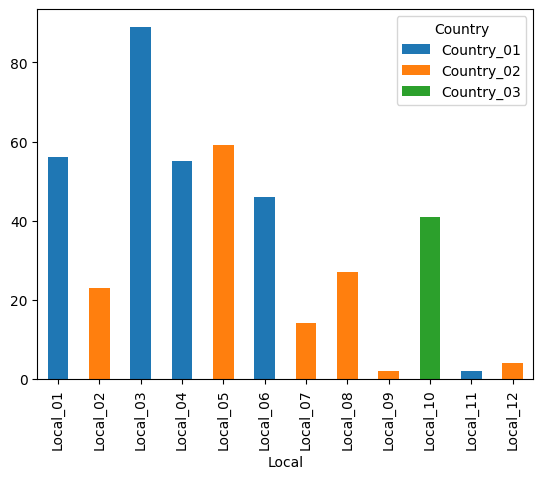

In [32]:
pd.crosstab(data['Local'], data['Country']).plot.bar(stacked=True)

##### Observations
- Local_01, Local_03, Local_04, Local_06 and Local_11 situated in Country_01
- Local_02, Local_05, Local_07, Local_08, Local_09 and Local_12 situated in Country_02
- Only single location - Local_10 situated in Country_03
- Local_03 have highest incidents around 90.
    

In [33]:
pd.crosstab(data['Country'], data['Industry Sector'])

Industry Sector,Metals,Mining,Others
Country,,,
Country_01,46,200,2
Country_02,88,37,4
Country_03,0,0,41


<Axes: xlabel='Country'>

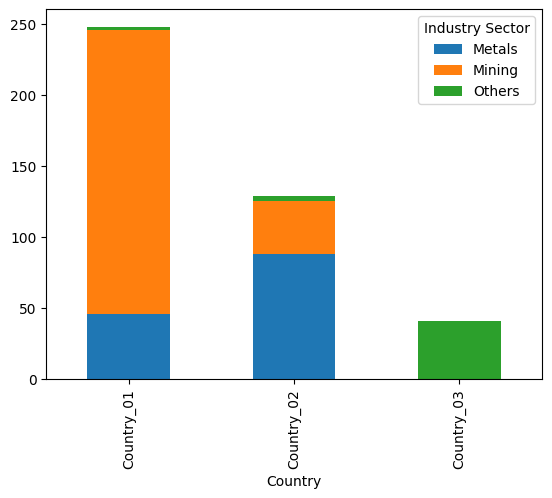

In [34]:
pd.crosstab(data['Country'], data['Industry Sector']).plot.bar(stacked=True)

In [35]:
# 2.C Create a function that will accept a DataFrame as input and return pie-charts for all the appropriate Categorical features. 
    # Clearly show percentage distribution in the pie-chart.
#Function to plot Stacked-Charts for given categorical variables in the dataframe
def stacked_charts_for_multiCategoricalVar(list_ofCategorical_cols, main_col, df, gridSize):
    '''Takes in a dataframe(df_pie) and plots pie charts for all categorical columns. m = number of columns required in grid'''
    # number of categorical columns
    ncols = gridSize
    # calculate number of rows on fig
    nrows = len(list_ofCategorical_cols) // ncols + (len(list_ofCategorical_cols) % ncols > 0)
    plt.figure(figsize=(15, 15))
    plt.subplots_adjust(hspace=0.8)
    plt.suptitle("Stacked-Charts for Categorical Variables in the dataframe", fontsize=18, y=0.95)

    # loop through the length of 'b' and keep track of index
    for n, i in enumerate(list_ofCategorical_cols):
        # add a new subplot iteratively using nrows and ncols
        ax = plt.subplot(nrows, ncols, n + 1)

        # filter df and plot 'i' on the new subplot axis
        crosstable = pd.crosstab(df[main_col], df[i])
        print(f"\n Normalized CrossTab for {main_col} and {i} \n {pd.crosstab(df[main_col], df[i], normalize='index').round(4)*100}")
        crosstable.plot(kind='bar', stacked=True, ax=ax, fontsize=7)
        
        ax.set_title(i.upper())
        ax.set_xlabel(main_col)
        ax.set_ylabel("frequency")
    plt.show()

### Mutivariate analysis for `Accident Level`


 Normalized CrossTab for Accident Level and Country 
 Country         Country_01  Country_02  Country_03
Accident Level                                    
I                    57.28       31.72       11.00
II                   47.50       47.50        5.00
III                  67.74       22.58        9.68
IV                   76.67       16.67        6.67
V                   100.00        0.00        0.00

 Normalized CrossTab for Accident Level and Industry Sector 
 Industry Sector  Metals  Mining  Others
Accident Level                         
I                 34.63   52.75   12.62
II                30.00   65.00    5.00
III               22.58   64.52   12.90
IV                23.33   70.00    6.67
V                 12.50   87.50    0.00

 Normalized CrossTab for Accident Level and Gender 
 Gender          Female    Male
Accident Level                
I                 5.83   94.17
II                7.50   92.50
III               3.23   96.77
IV                0.00  100.00
V    

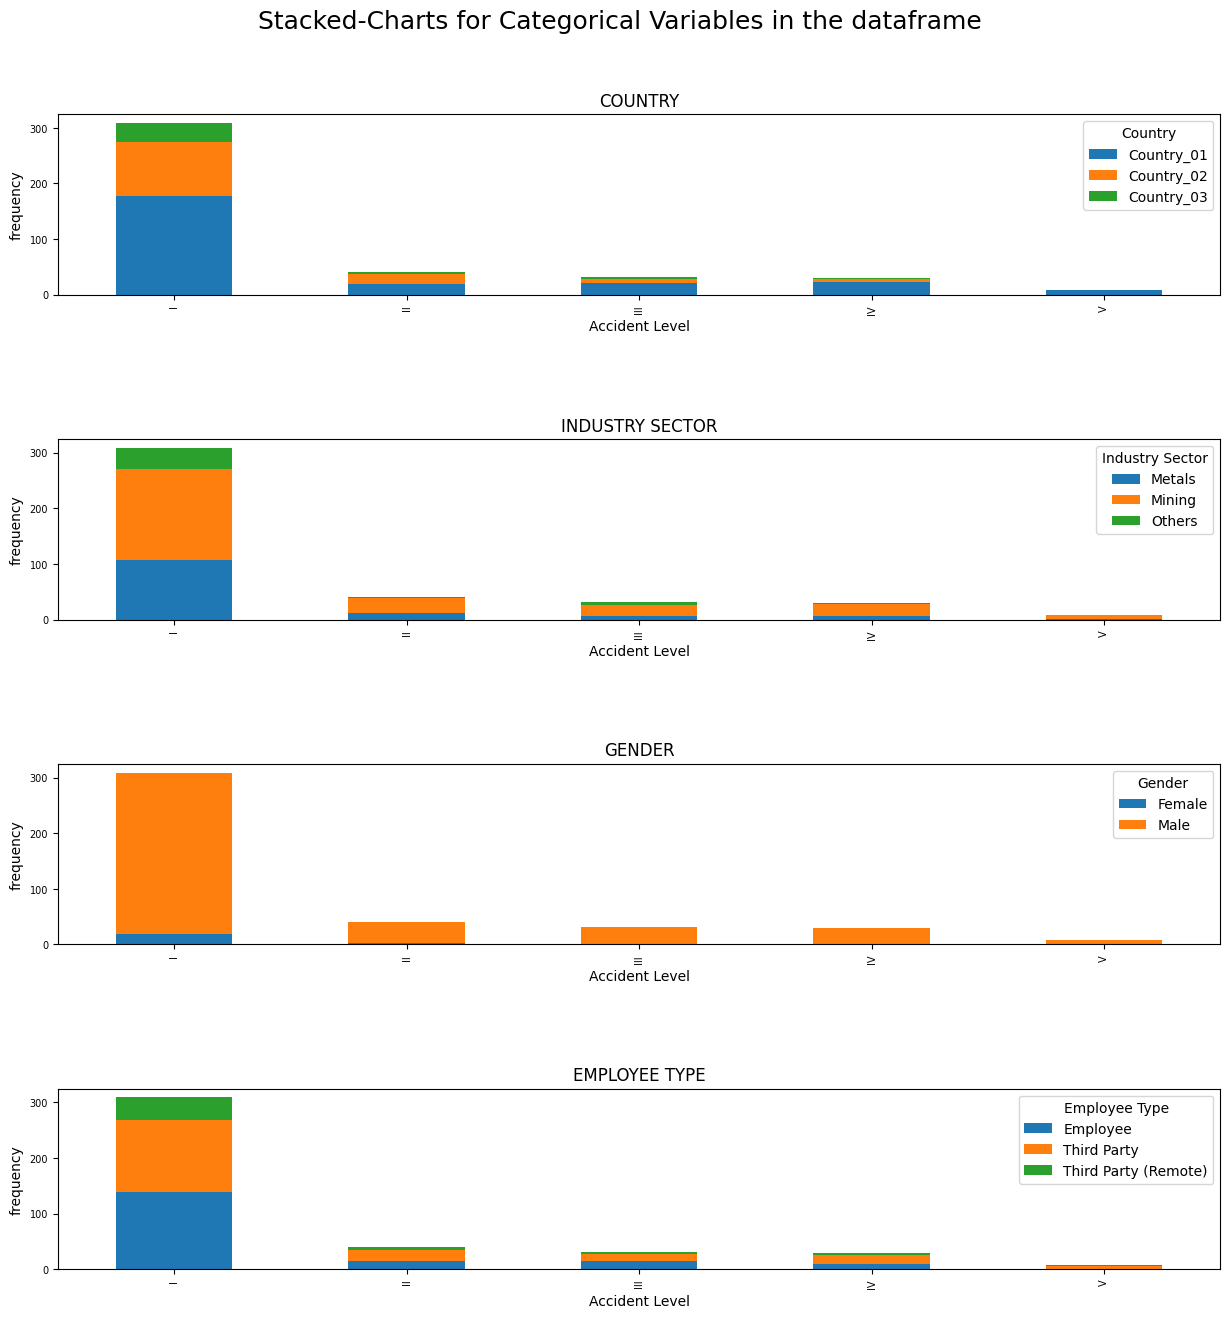

In [36]:
cols = ['Country', 'Industry Sector', 'Gender', 'Employee Type']
stacked_charts_for_multiCategoricalVar(cols, 'Accident Level', data, 1) 

#### Observations on `Accident Level` w.r.t `Country`, `Industry Sector`, `Gender` and `Employee Type`

1. Country Wise

2. Sector Wise

3. Gender Wise

4. Employee Types Wise

### Mutivariate analysis for `Potential Accident Level`


 Normalized CrossTab for Potential Accident Level and Country 
 Country                   Country_01  Country_02  Country_03
Potential Accident Level                                    
I                              22.22       13.33       64.44
II                             53.68       42.11        4.21
III                            60.38       38.68        0.94
IV                             71.63       23.40        4.96
V                              70.00       30.00        0.00
VI                            100.00        0.00        0.00

 Normalized CrossTab for Potential Accident Level and Industry Sector 
 Industry Sector           Metals  Mining  Others
Potential Accident Level                        
I                          15.56   17.78   66.67
II                         50.53   42.11    7.37
III                        41.51   57.55    0.94
IV                         23.40   70.21    6.38
V                           6.67   93.33    0.00
VI                          0.0

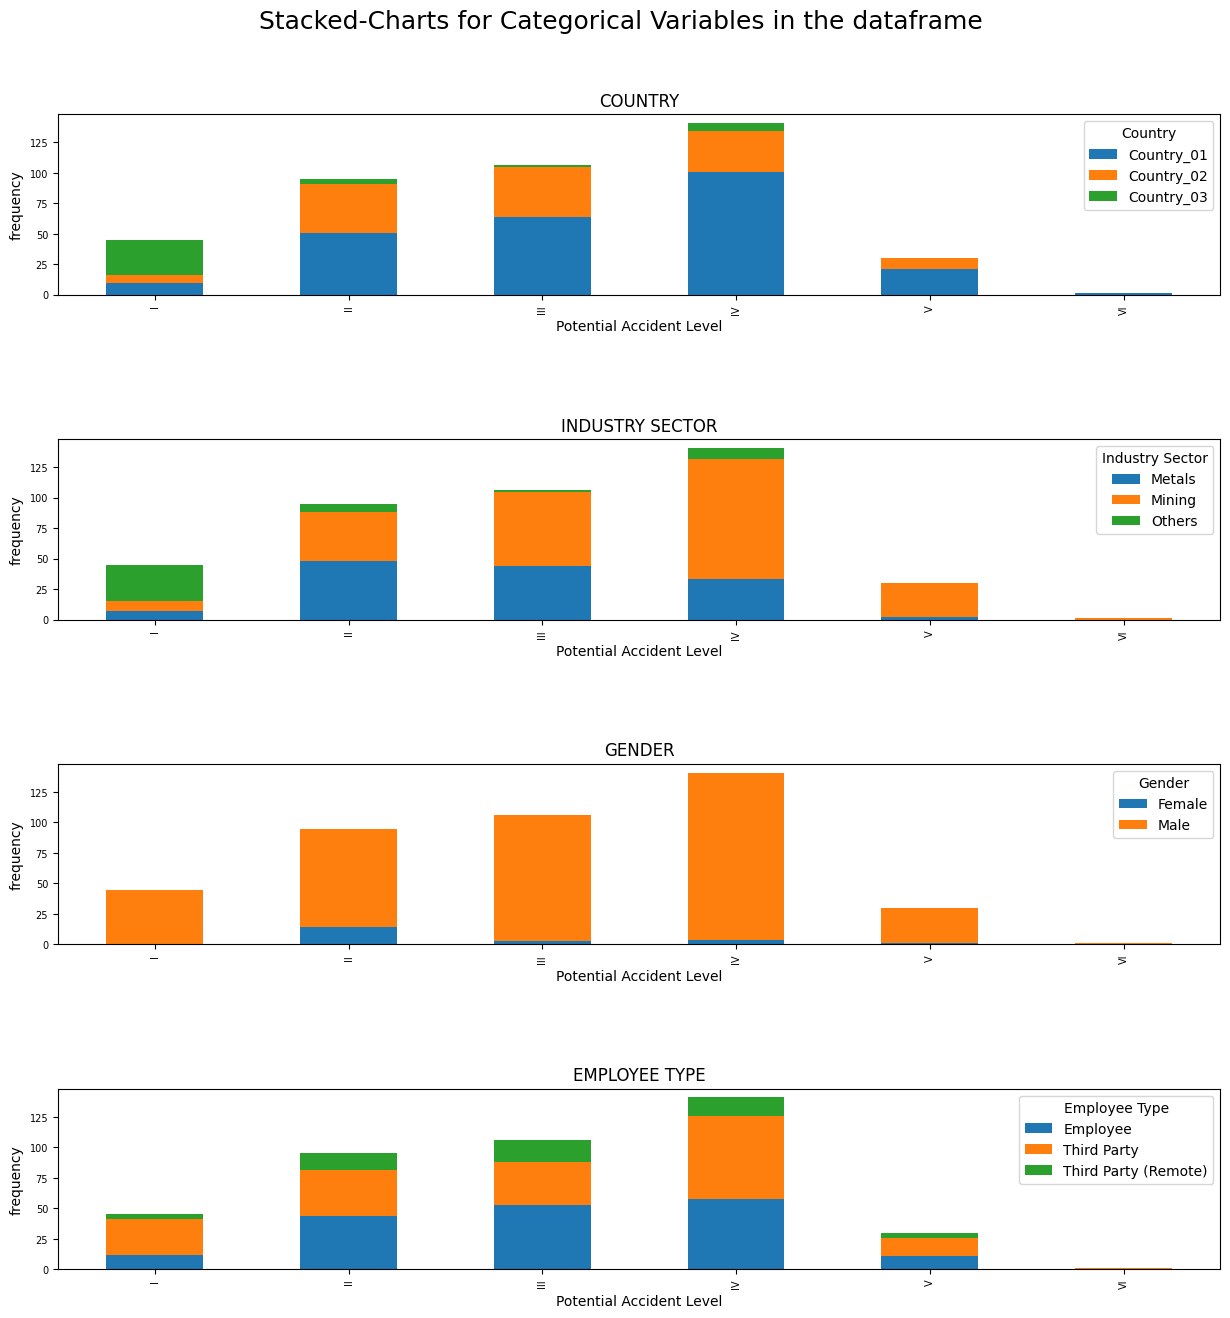

In [37]:
cols = ['Country', 'Industry Sector', 'Gender', 'Employee Type']
stacked_charts_for_multiCategoricalVar(cols, 'Potential Accident Level', data, 1) 

#### Observations on `Potential Accident Level` w.r.t `Country`, `Industry Sector`, `Gender` and `Employee Type`

1. Country Wise

2. Sector Wise

3. Gender Wise

4. Employee Types Wise

### Bivariate analysis for `Accident Level` and `Potential Accident Level`

In [38]:
pd.crosstab(data['Accident Level'], data['Potential Accident Level'], normalize='index').round(4)*100

Potential Accident Level,I,II,III,IV,V,VI
Accident Level,,,,,,
I,14.56,28.48,28.80,25.24,2.91,0.0
II,0.00,17.50,35.00,40.00,7.50,0.0
III,0.00,0.00,9.68,83.87,6.45,0.0
IV,0.00,0.00,0.00,70.00,30.00,0.0
V,0.00,0.00,0.00,0.00,87.50,12.5


<Axes: xlabel='Accident Level'>

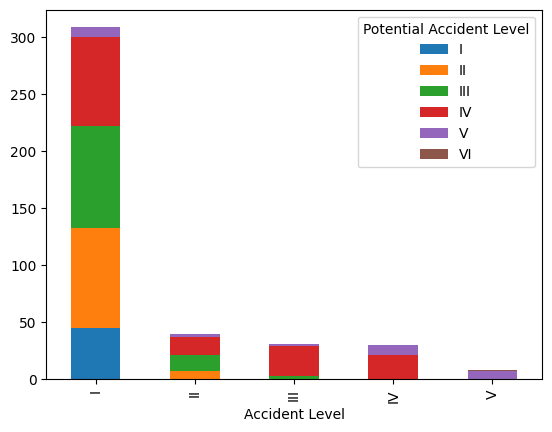

In [39]:
# visual Plotting
pd.crosstab(data['Accident Level'], data['Potential Accident Level']).plot.bar(stacked=True)

#### Observations on `Accident Level` w.r.t `Potential Accident Level`
- Only 40 `Type-I Accident Level` also have `Type-I Potential Accident Level` i.e No change in actual and potential.
- About 260+ `Type-I Accident Level` have increased `Potential Accident Level of II to IV` and `very small ~3% to Level-V`
- Most of Critical `Accidents Level of Type V` remain same in `Potential Accident Level 87.5 %` but `12.5% are moved to life threating Type VI of Potential Accident Level`


In [40]:
pd.crosstab(data['Critical Risk'], data['Accident Level'], normalize='index').round(4)*100

Accident Level,I,II,III,IV,V
Critical Risk,,,,,
Bees,100.00,0.00,0.00,0.00,0.00
Blocking and isolation of energies,100.00,0.00,0.00,0.00,0.00
Burn,0.00,0.00,100.00,0.00,0.00
Chemical substances,88.24,11.76,0.00,0.00,0.00
Confined space,100.00,0.00,0.00,0.00,0.00
Cut,78.57,14.29,7.14,0.00,0.00
Electrical Shock,100.00,0.00,0.00,0.00,0.00
Electrical installation,0.00,0.00,0.00,100.00,0.00
Fall,66.67,0.00,0.00,22.22,11.11


In [41]:
pd.crosstab(data['Critical Risk'], data['Potential Accident Level'], normalize='index').round(4)*100

Potential Accident Level,I,II,III,IV,V,VI
Critical Risk,,,,,,
Bees,100.00,0.00,0.00,0.00,0.00,0.00
Blocking and isolation of energies,0.00,33.33,66.67,0.00,0.00,0.00
Burn,0.00,0.00,0.00,100.00,0.00,0.00
Chemical substances,0.00,29.41,47.06,23.53,0.00,0.00
Confined space,0.00,0.00,100.00,0.00,0.00,0.00
Cut,7.14,42.86,35.71,14.29,0.00,0.00
Electrical Shock,0.00,0.00,0.00,100.00,0.00,0.00
Electrical installation,0.00,0.00,0.00,0.00,100.00,0.00
Fall,11.11,11.11,44.44,22.22,11.11,0.00


#### Observations

### Mutivariate analysis for `Gender` w.r.t `Industry Sector`, `Employee Type` , `Country` and `Location`


 Normalized CrossTab for Gender and Industry Sector 
 Industry Sector  Metals  Mining  Others
Gender                                 
Female            59.09   22.73   18.18
Male              30.56   58.59   10.86

 Normalized CrossTab for Gender and Employee Type 
 Employee Type  Employee  Third Party  Third Party (Remote)
Gender                                                    
Female            36.36        40.91                 22.73
Male              42.93        44.44                 12.63

 Normalized CrossTab for Gender and Country 
 Country  Country_01  Country_02  Country_03
Gender                                     
Female        31.82       68.18        0.00
Male          60.86       28.79       10.35

 Normalized CrossTab for Gender and Local 
 Local   Local_01  Local_02  Local_03  Local_04  Local_05  Local_06  Local_07  \
Gender                                                                         
Female      0.00      0.00     13.64      4.55     31.82      9.09  

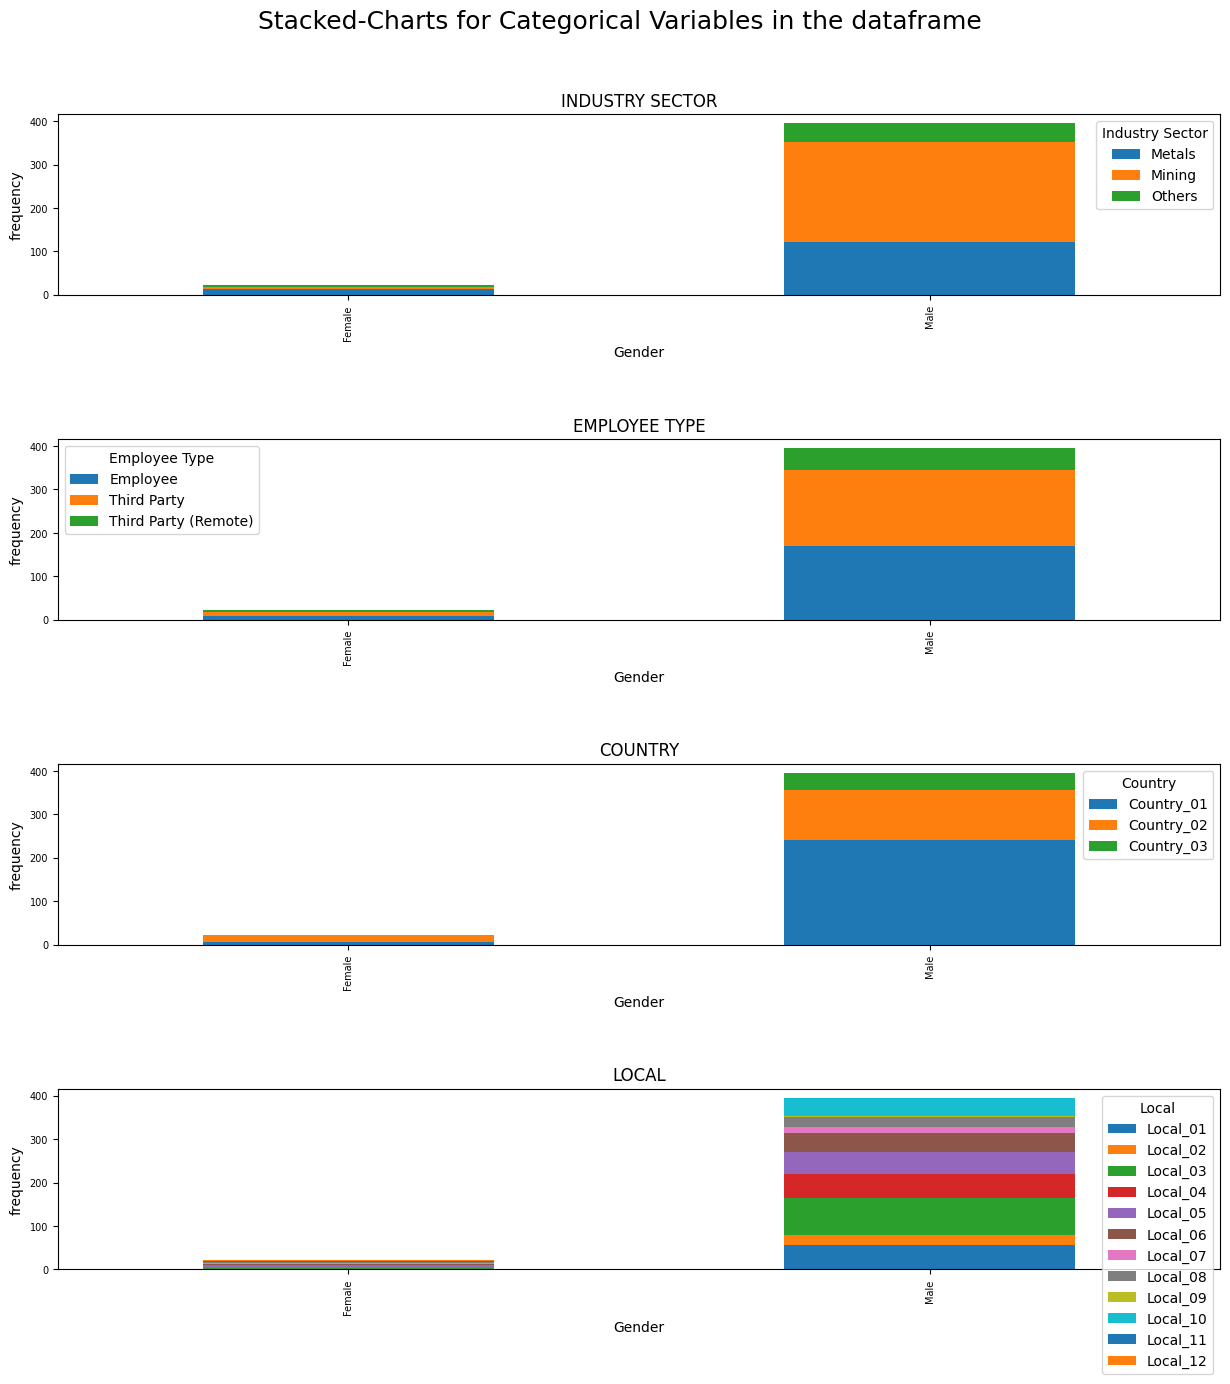

In [42]:
cols = ['Industry Sector','Employee Type', 'Country', 'Local']
stacked_charts_for_multiCategoricalVar(cols, 'Gender', data, 1) 


 Normalized CrossTab for Industry Sector and Gender 
 Gender           Female   Male
Industry Sector               
Metals             9.70  90.30
Mining             2.11  97.89
Others             8.51  91.49

 Normalized CrossTab for Industry Sector and Employee Type 
 Employee Type    Employee  Third Party  Third Party (Remote)
Industry Sector                                             
Metals              56.72        23.13                 20.15
Mining              37.55        50.63                 11.81
Others              27.66        72.34                  0.00

 Normalized CrossTab for Industry Sector and Country 
 Country          Country_01  Country_02  Country_03
Industry Sector                                    
Metals                34.33       65.67        0.00
Mining                84.39       15.61        0.00
Others                 4.26        8.51       87.23

 Normalized CrossTab for Industry Sector and Local 
 Local            Local_01  Local_02  Local_03  Local_

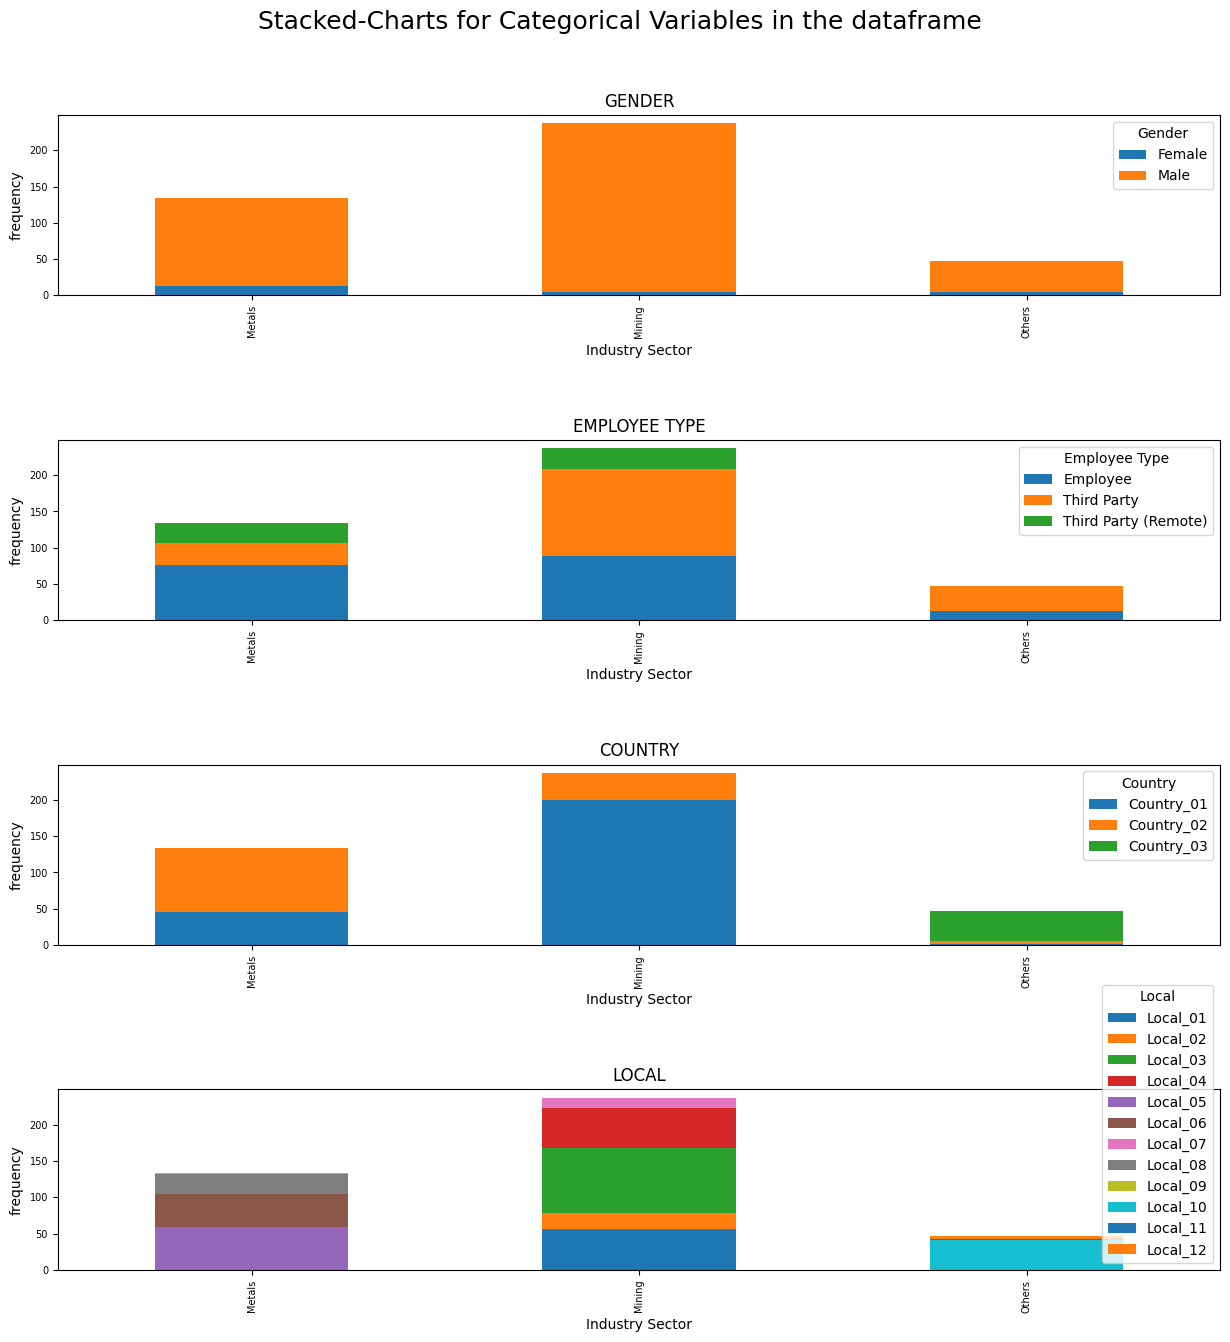

In [43]:
cols = ['Gender','Employee Type', 'Country', 'Local']
stacked_charts_for_multiCategoricalVar(cols, 'Industry Sector', data, 1) 

#### Observations

### Preprocessing the textual column

In [44]:
dataset = data.copy()

In [45]:
set_stopWords = stopwords.words('english')

In [46]:
# define function to lemmatize tokens
def lemmatize_tokens(tokens):
    # convert POS tag to WordNet format
    def get_wordnet_pos(word):
        tag = nltk.pos_tag([word])[0][1][0].upper()
        tag_dict = {"J": wordnet.ADJ,
                    "N": wordnet.NOUN,
                    "V": wordnet.VERB,
                    "R": wordnet.ADV}
        return tag_dict.get(tag, wordnet.NOUN)
    
    # lemmatize tokens
    lemmas = [lemmatizer.lemmatize(token, get_wordnet_pos(token)) for token in tokens]
    
    # return lemmatized tokens as a list
    return lemmas

In [47]:
def preprocess_text(text):
    # Expand the contarctions like : i've -> I have 
    #using contractions library from https://pypi.org/project/pycontractions/
    
    text = contractions.fix(text)
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove special characters and numbers
    text = re.sub(r'[^A-Za-z\s]', '', text)

    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Split text into separate words
    words = text.split()

    # Removing English language stopwords
    text = ' '.join([word for word in words if word not in set_stopWords])

    # Applying the WordNet Lemmetizer on every word of a message and joining the lemmetized words back into a single string
    text = ' '.join(lemmatize_tokens(words))

    return text

In [48]:
dataset['Cleaned Description'] = dataset['Description'].apply(preprocess_text)

In [49]:
dataset.sample(4)

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee Type,Critical Risk,Description,year,month,quarter,Cleaned Description
187,2016-08-11,Country_02,Local_12,Others,I,IV,Female,Employee,Others,"On leaving the Company the employee stumbled onto the exit ladder of the building and fell 3 steps, causing twisting of the ankle and grating on the cinnamon",2016,8,3,on leave the company the employee stumble onto the exit ladder of the building and fell step cause twist of the ankle and grate on the cinnamon
237,2016-10-13,Country_01,Local_03,Mining,III,IV,Male,Employee,Others,"In phase I, the operator carried out the removal of inchancanbles of the reciprocating feeder, while removing a split set with the support of a rope, the staff supports the left hand on the structure of the protection against falling, it is at this moment that another split set comes out together with the load and hits on the distal phalanx of the fifth finger of the left hand, generating the described injury.",2016,10,4,in phase i the operator carry out the removal of inchancanbles of the reciprocate feeder while remove a split set with the support of a rope the staff support the left hand on the structure of the protection against fall it be at this moment that another split set come out together with the load and hit on the distal phalanx of the fifth finger of the left hand generate the described injury
18,2016-02-08,Country_01,Local_06,Metals,I,II,Male,Employee,Others,"An auxiliary wheel of the cathode crane G2133 was changed in area 75, when when a bearing was heated and hit with a hammer and chisel at one end of the bearing track, a detachment of a bearing piece occurred, impacting it in the thigh of the right leg producing a cut. The ambulance is called and you are transferred to the clinic.",2016,2,1,an auxiliary wheel of the cathode crane g be change in area when when a bearing be heat and hit with a hammer and chisel at one end of the bearing track a detachment of a bearing piece occur impact it in the thigh of the right leg produce a cut the ambulance be call and you be transfer to the clinic
216,2016-09-20,Country_03,Local_10,Others,I,I,Male,Third Party,Fall,"Collaborator around 9:00 AM, cleaning the leaves of the return well of the 5021 borehole BRAPDD 0183 slipped on the canvas that was on the edge of the well, hitting the right side of the back against the metal structure of the mud-swathed box causing a slight excoriation. The employee was referred to the local hospital, medicated and released for the activities.",2016,9,3,collaborator around be cleaning the leaf of the return well of the borehole brapdd slip on the canvas that be on the edge of the well hit the right side of the back against the metal structure of the mudswathed box cause a slight excoriation the employee be refer to the local hospital medicate and release for the activity


In [53]:
dataset.to_excel('prepareNLPprocessing.xlsx',index=False)